In [2]:
import sys,os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sys.path.append(os.getcwd())

# geneopt2

In [4]:
import testfuncs
import geneopt2
import goal

In [164]:
def f(val):
    x=val[0]
    y=val[1]
    return my_func.do(x,y)

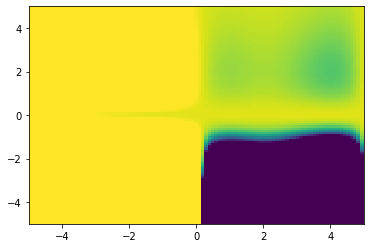

In [278]:
plt.pcolormesh(X,Y,Z,vmin=-10,vmax=0.5)

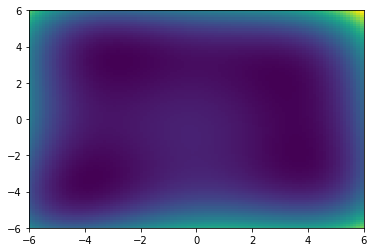

In [281]:
my_func=testfuncs.Himmelblau()
X=np.linspace(my_func.Xdomain()[0],my_func.Xdomain()[1],100)
Y=np.linspace(my_func.Ydomain()[0],my_func.Ydomain()[1],100)
Z=[]
for y in Y:
    Z.append([my_func.do(x,y)for x in X])
plt.pcolormesh(X,Y,Z)

In [282]:
val_ranges=[
    (my_func.Xdomain()[0],my_func.Xdomain()[1])
    ,(my_func.Ydomain()[0],my_func.Ydomain()[1])
]
my_goal=goal.Minimize()
inherit_ways={
    geneopt2.Meaning(1):90
    ,geneopt2.SheerNew():10
}

In [283]:
N=100
num_parent=20
num_generation=15
opt=geneopt2.GeneticOptimizer(
    2 # M
    ,f
    ,val_ranges
    ,my_goal # goal
    ,N
    ,num_parent
    ,num_generation
    ,inherit_ways
)
#opt.enable_debug()

CPU times: user 39.7 ms, sys: 0 ns, total: 39.7 ms
Wall time: 40.4 ms


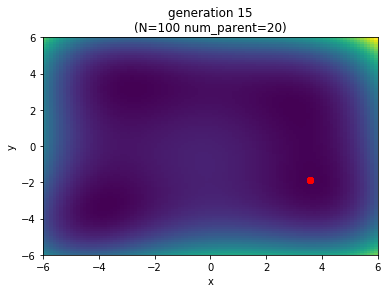

In [284]:
final_generation_variable_list=None
%time final_generation_variable_list,log=opt.execute()

for i,variable_list in enumerate(log,1):
    plt.cla()
    data=np.transpose(variable_list)
    plt.pcolormesh(X,Y,Z)
    plt.scatter(data[0],data[1],c='r',alpha=0.5)
    plt.xlim(my_func.Xdomain())
    plt.ylim(my_func.Ydomain())
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('generation {}\n(N={} num_parent={})'.format(i,N,num_parent))
    plt.savefig('./result/{}.png'.format(i))

In [264]:
print(my_func.Xmin(),my_func.Ymin())
final_generation_variable_list

[7.917] [7.917]


[[-7.39725951610447, 5.169095778104361],
 [-7.397250184999945, 5.169063950669747],
 [-7.3972525174984405, 5.169126233970329],
 [-7.397216709402861, 5.169072118311095],
 [-7.3973864865591015, 5.169115846506486],
 [-7.3973914290299865, 5.169058532186214],
 [-7.397143497102633, 5.169127245884408],
 [-7.39720428386232, 5.169229077474808],
 [-7.397462989960574, 5.169129961881046],
 [-7.39709220726691, 5.16909419446707],
 [-7.397466760796395, 5.169253586092723],
 [-7.397516136289419, 5.16898825191273],
 [-7.397224105755327, 5.169344419083456],
 [-7.397019132721053, 5.168979382791314],
 [-7.397077972971167, 5.169313539954216],
 [-7.397434145052279, 5.168790801085087],
 [-7.397417194938851, 5.168744308764173],
 [-7.397635294523875, 5.1689653446968755],
 [-7.397644004765258, 5.168964969761498],
 [-7.396956590693745, 5.1692926838154465]]

# geneopt1

In [ ]:
import goal
import geneopt1

In [ ]:
#標的関数の用意
def target_func(variable_list):
    x=variable_list[0]
    y=variable_list[1]
    return (x*x+y-11)**2+(x+y*y-7)**2

In [ ]:
import matplotlib.pyplot as plt
X=np.linspace(-6,6,100)
Y=np.linspace(-6,6,100)
Z=[]
for y in Y:
    Z.append([target_func([x,y])for x in X])
plt.pcolormesh(Z,vmin=0,vmax=700,cmap=plt.get_cmap('ocean'))

In [ ]:
#発現方法の定義
expression_x=geneopt1.Expression(-6,6,20)
expression_y=geneopt1.Expression(-6,6,20)
print(expression_x)

In [ ]:
#最適化目標の指定
my_goal=goal.Minimize()
print(my_goal)

In [ ]:
#遺伝方法の指定
inherit_ways={
    geneopt1.GeneticCrossing(0.05):1.0
    ,geneopt1.SheerMutation():0.01
}
inherit_ways

In [ ]:
my_geneopt1=geneopt1.GeneticOptimizer(
    2 #2つの変数を取る関数
    ,target_func #この関数に対して最適化する
    ,[expression_x,expression_y] #x,yをそれぞれ発現してもらう
    ,my_goal
    ,100 #1世代あたりの個体数
    ,20 #親にする個体数
    ,10 #10世代やる
    ,inherit_ways
)
my_geneopt1.enable_debug()
print(my_geneopt1)

In [ ]:
final_generation_variable_list=my_geneopt1.execute()
print(final_generation_variable_list)

In [ ]:
plt.pcolormesh(X,Y,Z,vmin=0,vmax=700,cmap=plt.get_cmap('ocean'))
for variable in final_generation_variable_list:
    plt.scatter(variable[0],variable[1],color='r',marker='.')

plt.show()